# Description:

Governments all over the world took multiple approaches to dealing with the Covid-19 pandemic. Some forced lockdowns, stopped schools, prohibited public gatherings, etc...

We will analyze whether these decisions actually proved useful in dealing with the pandemic in Quebec, Canada and explain how it did or didn't affect the cases of people getting infected with Covid-19. 

We will take into consideration three of the major events in Quebec:

<ul>
    <li>The lockdown on March 20th, 2020</li>
    <li>The reopening of schools in August 31st, 2020</li>
    <li>The lockdown on December 25th, 2020</li>
</ul>

According to CDC, symptoms may appear 2-14 days after exposure to the virus. Therefore we will assume that all new cases have been reported after 14 days of being infected with the virus.

Hence our thresholds will be:

<ul>
    <li>April 2nd, 2020</li>
    <li>September 13th, 2020</li>
    <li>January 7th, 2021</li>
</ul>

We will use a time window of two weeks to observe the number of new cases before and after the threshold. This means that the first window will inform us of the Covid-19 cases prior to the event while the second window will inform us of the Covid-19 cases after the event took place.



source : https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', UserWarning)

# EDA:

We will start by importing and understanding the data necessary to have clarity on the objective required.

In [2]:
url = 'https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_RapportINSPQ_HistoVigie.csv'

# importing the data needed

data = pd.read_csv(url, skiprows = [1])

data.head()

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
0,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Check data types we are dealing with

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1004 non-null   object
 1   Nb_Cas_Cumulatif            1004 non-null   int64 
 2   Nb_Nvx_Cas                  1004 non-null   int64 
 3   Nb_Deces_Cumulatif_Total    1004 non-null   int64 
 4   Nb_Deces_Cumulatif_CHCHSLD  1004 non-null   int64 
 5   Nb_Deces_Cumulatif_RPA      1004 non-null   int64 
 6   Nb_Deces_Cumulatif_DomInc   1004 non-null   int64 
 7   Nb_Deces_Cumulatif_Autre    1004 non-null   int64 
 8   Nb_Nvx_Deces_Total          1004 non-null   int64 
 9   Nb_Nvx_Deces_CHCHSLD        1004 non-null   int64 
 10  Nb_Nvx_Deces_RPA            1004 non-null   int64 
 11  Nb_Nvx_Deces_DomInc         1004 non-null   int64 
 12  Nb_Nvx_Deces_Autre          1004 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 102.1+ KB


In [4]:
# check for any null values

data.isna().sum()

Date                          0
Nb_Cas_Cumulatif              0
Nb_Nvx_Cas                    0
Nb_Deces_Cumulatif_Total      0
Nb_Deces_Cumulatif_CHCHSLD    0
Nb_Deces_Cumulatif_RPA        0
Nb_Deces_Cumulatif_DomInc     0
Nb_Deces_Cumulatif_Autre      0
Nb_Nvx_Deces_Total            0
Nb_Nvx_Deces_CHCHSLD          0
Nb_Nvx_Deces_RPA              0
Nb_Nvx_Deces_DomInc           0
Nb_Nvx_Deces_Autre            0
dtype: int64

In [5]:
# summarize the data

data.describe()

,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
count,1.004000e+03,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,4.579738e+05,1216.400398,9967.283865,4944.438247,1988.975100,2549.330677,484.539841,16.792829,6.616534,3.284861,6.151394,0.740040
std,4.094121e+05,2070.394792,4750.751174,1827.362760,1003.373159,1904.541113,222.649543,23.522733,15.110737,4.848300,7.204808,1.441152
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.884150e+04,361.000000,5882.750000,3983.250000,987.500000,620.000000,292.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,3.672290e+05,775.000000,11226.500000,5725.000000,2368.000000,2555.500000,578.000000,7.000000,1.000000,1.000000,4.000000,0.000000
75%,9.013125e+05,1264.500000,13957.250000,6190.750000,2814.500000,4276.750000,675.250000,20.000000,5.000000,4.000000,9.000000,1.000000
max,1.221266e+06,18780.000000,16860.000000,6643.000000,3298.000000,6176.000000,743.000000,153.000000,100.000000,30.000000,52.000000,10.000000


Since we are dealing with a time series dataset we will convert the `Date` column to a `datetime` object for easier access.

We will then rename the column to its English translation to address the general observants of the data.

In [6]:
# converting Date column to Datetime

data['Date'] = pd.to_datetime(data['Date'])

# Renaming Nb_Nvx_Cas column to Nb_New_Cases

data.rename(columns = {
    'Nb_Nvx_Cas':'Nb_New_Cases'
}, inplace = True)

data.head()

,Date,Nb_Cas_Cumulatif,Nb_New_Cases,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
0,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0


Since the data we want to observe extends from 2020 to 2021, we will take a subset from the whole data and include the only two years of interest to us.

In [7]:
data_2020_2021 = data[data['Date'].dt.year < 2022]

We will create three DataFrames from the subsetted data.

We will include the following time periods:

<ul>
    <li>From: March 20th, 2020 &#8594; To: April 16th, 2020</li>
    <li>From: August 31th, 2020 &#8594; To: September 27th, 2020</li>
    <li>From: December 25th, 2020 &#8594; To: January 21st, 2021</li>
</ul>

In [8]:
# March data

## Include March and April first

data_march = data_2020_2021[(data_2020_2021['Date'].dt.month == 3) | (data_2020_2021['Date'].dt.month == 4)][['Date', 'Nb_New_Cases']]

## Subset the data of interest

date1 = data_march[(data_march['Date'] >= '2020-03-20') & (data_march['Date'] <= '2020-04-16')]

In [9]:
# September data

## Include August and September first

date_september = data_2020_2021[(data_2020_2021['Date'].dt.month == 8) | (data_2020_2021['Date'].dt.month == 9)][['Date', 'Nb_New_Cases']]

## Subset the data of interest

date2 = date_september[(date_september['Date'] >= '2020-08-31') & (date_september['Date'] <= '2020-09-27')]

In [10]:
# December data

## Include December and January first

date_december = data_2020_2021[((data_2020_2021['Date'].dt.month == 1) & (data_2020_2021['Date'].dt.year == 2021)) | ((data_2020_2021['Date'].dt.month == 12) & (data_2020_2021['Date'].dt.year == 2020))][['Date', 'Nb_New_Cases']]

## Subset the data of interest

date3 = date_december[(date_december['Date'] >= '2020-12-25') & (date_december['Date'] <= '2021-01-21')]

## Graphing Data:

In order to further understand the data we are dealing with, we will plot scatterplots to observe the trends and boxplots to observe the quantile variation of our new Covid-19 cases.

In [11]:
# Here are the containers used to store information that will be called multiple times during our analysis

# Data of interest

dates = (date1, date2, date3)

# Titles for our events

title = (
    'Lockdown in March',
    'Reopening of schools in August',
    'Lockdown in December'
)

# Subsetting each event into before and after the event took place

sub_titles = (
    ('Before March lockdown', 'After March lockdown'), 
    ('Before school opening', 'After school opening'), 
    ('Before December lockdown', 'After December lockdown')
)

# The date of interest a.k.a Threshold

vertical_thresholds = (
    pd.to_datetime('2020-04-02'),
    pd.to_datetime('2020-09-13'),
    pd.to_datetime('2021-01-07'),
)

# Coordinate and texts to write on graph

text_x_location = (
    (pd.to_datetime('2020-03-20'), pd.to_datetime('2020-04-04')),
    (pd.to_datetime('2020-08-30'), pd.to_datetime('2020-09-15')),
    (pd.to_datetime('2020-12-25'), pd.to_datetime('2021-01-09')),
)

text_y_location = (
    (1000, 150),
    (900, 150),
    (1500, 3100),
)

texts = (
    ('Cases of people who got infected before', 'Cases of people who got infected after'),
    ('Cases of people who got infected before', 'Cases of people who got infected after'),
    ('Cases of people who got infected before', 'Cases of people who got infected after'),
)

In [12]:
# Makes it easier on the eye ;)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

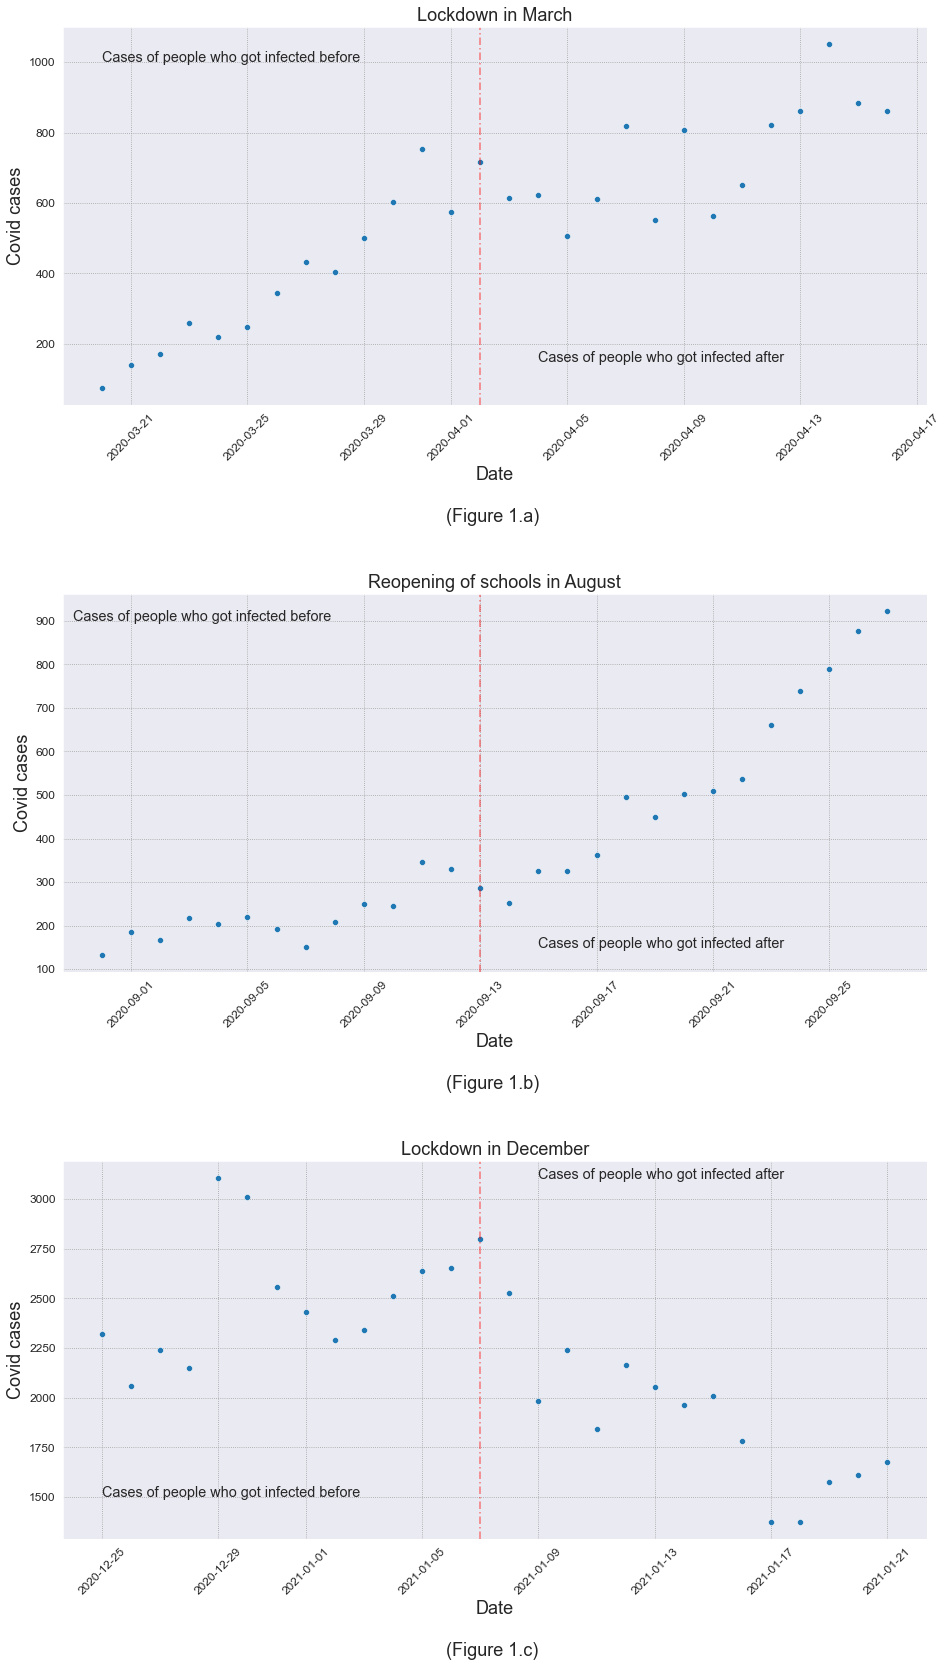

In [13]:
# We will draw three graphs for our three events

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)

# The figures' indexing for future referencing

fig_nums = ('(Figure 1.a) ','(Figure 1.b) ','(Figure 1.c) ')

# Instantiate a for loop for the three graphs

for i in range(3):
    
    # We start off by drawing the scatter plot for Number of Covid cases vs. Date

    sns.scatterplot(data = dates[i], x = 'Date', y = 'Nb_New_Cases', ax = ax[i])
    
    # We draw a vertical line represnting the threshold

    ax[i].axvline(vertical_thresholds[i], color = 'red', dashes = (5, 2, 1, 2), alpha = .5)

    # Title
    
    ax[i].set_title(title[i], fontsize = 18)
    
    # Setting the y labels

    ax[i].set_ylabel('Covid cases', fontsize = 18)
    
    # Setting the x labels and including each graph's reference

    ax[i].set_xlabel(f'Date\n\n{fig_nums[i]}', fontsize = 18)
    
    # Rotating the x ticks to have a more convenient x-axis notation

    ax[i].tick_params(axis='x', labelrotation = 45, labelsize = 'large')
    
    # Increasing font of y ticks
    
    ax[i].tick_params(axis='y', labelsize = 'large')
    
    # The text for before the event
    
    ax[i].text(x = text_x_location[i][0], y = text_y_location[i][0], s = texts[i][0], size = 'x-large')
    
    # The text for after the event
    
    ax[i].text(x = text_x_location[i][1], y = text_y_location[i][1], s = texts[i][1], size = 'x-large')

plt.show()

### Initial Observation:

<ul>

   <li>
       Figure 1.a : We observe that we have an increase in the number of Covid Cases before and after the lockdown. However we would require further analysis to observe the rate of these cases.
   </li>
    <br>
   <li>
       Figure 1.b : We observe a shy increase of Covid cases before the opening schools followed by a steep and severe increase in the number of Covid cases after schools reopened.
   </li>
    <br>
   <li>
       Figure 1.c : We observe an instable variation of increasing and decreasing of Covid cases before the lockdown. However we observe a stable decrease in the Covid cases after the lockdown took place.
   </li>
    
</ul>

Of course jumping into conclusions would be naive blunder. We will further subset the data of each event into two seperate parts. We will create two subsets for each event describing the Covid-19 cases before `(pre)` and after `(post)` the event took place.

In [14]:
# Before March lockdown

date1_pre = date1[(date1['Date'] >= '2020-03-20') & (date1['Date'] <= '2020-04-02')][['Nb_New_Cases']]

# After March lockdown

date1_post = date1[(date1['Date'] > '2020-04-02') & (date1['Date'] <= '2020-04-16')][['Nb_New_Cases']]

# Before school opening

date2_pre = date2[(date2['Date'] >= '2020-08-31') & (date2['Date'] <= '2020-09-13')][['Nb_New_Cases']]

# After school opening

date2_post = date2[(date2['Date'] > '2020-09-13') & (date2['Date'] <= '2020-09-27')][['Nb_New_Cases']]

# Before December lockdown

date3_pre = date3[(date3['Date'] >= '2020-12-25') & (date3['Date'] <= '2021-01-07')][['Nb_New_Cases']]

# After December lockdown

date3_post = date3[(date3['Date'] > '2020-01-07') & (date3['Date'] <= '2021-01-21')][['Nb_New_Cases']]


In [15]:
# Storing the subsetted data for future access

data = (
    (date1_pre, date1_post),
    (date2_pre, date2_post),
    (date3_pre, date3_post)
)

## Boxplots:

In order to properly visualize the boxplots we will have to concatenate the `pre` and `post` subsets of each event respectively. We will assign those flags into a new column `Period` to indicate if the associating date is before or after the event.

In [16]:
# March lockdown Data

date1_pre['Period'] = 'Pre'
date1_post['Period'] = 'Post'

# August school opening Data

date2_pre['Period'] = 'Pre'
date2_post['Period'] = 'Post'

# December lockdown Data

date3_pre['Period'] = 'Pre'
date3_post['Period'] = 'Post'

# Create DataFrames to properly use the boxplot

d1 = pd.concat([date1_pre, date1_post])
d2 = pd.concat([date2_pre, date2_post])
d3 = pd.concat([date3_pre, date3_post])

# Storing the data for future access

data_box = (d1,d2,d3)

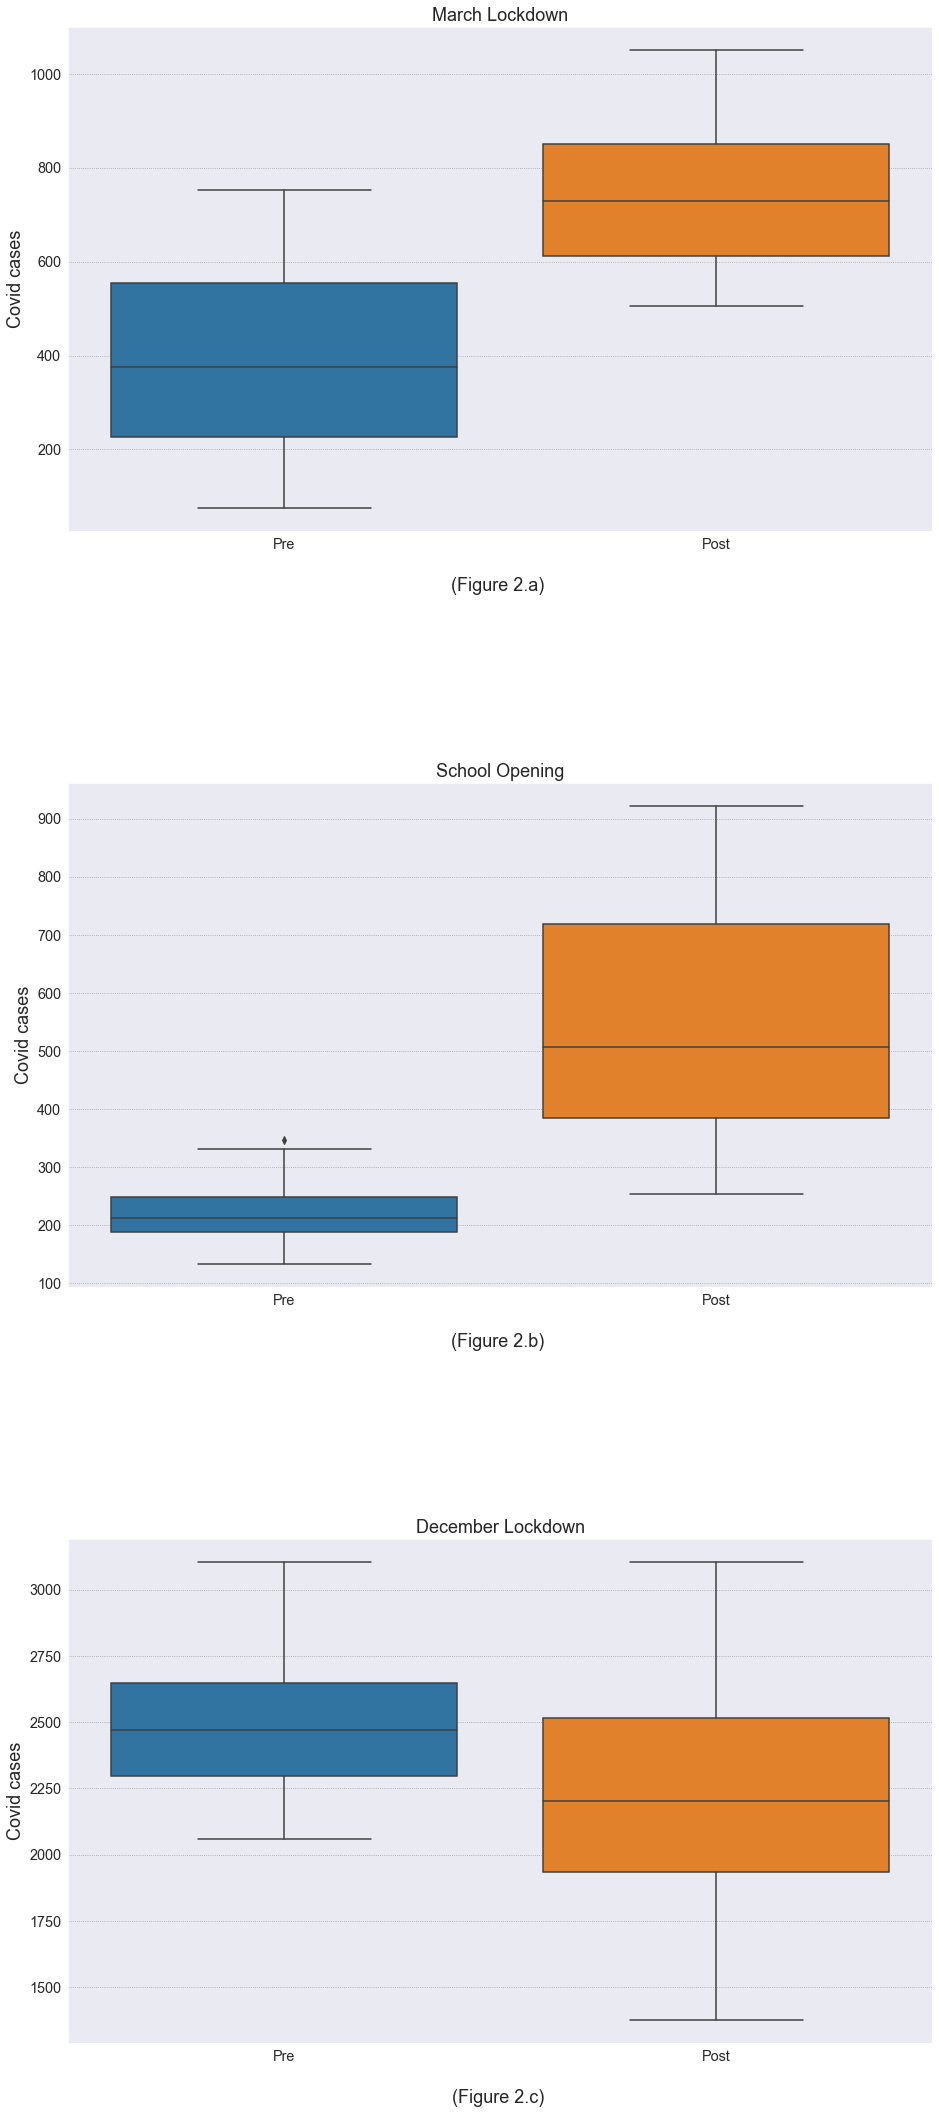

In [17]:
fig, ax = plt.subplots(3, figsize = (15,20))

mult_fig_names = ("March Lockdown", "School Opening","December Lockdown")
mult_fig_nums = ("(Figure 2.a) ", "(Figure 2.b) ","(Figure 2.c) ")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)

for i in range(3):
    
    # Plotting the boxplot and seperating by the period (i.e pre, post)
    
    sns.boxplot(data = data_box[i], x = 'Period', y = 'Nb_New_Cases' ,ax = ax[i])
    
    # Increasing font of y ticks

    ax[i].tick_params(axis='y', labelsize = 'x-large')
    
    # Increasing font of x ticks
    
    ax[i].tick_params(axis='x', labelsize = 'x-large')
    
    # Title
    
    ax[i].set_title(mult_fig_names[i], fontsize = 18)
    
    # Setting the x labels and including each graph's reference

    ax[i].set_xlabel(f'\n{mult_fig_nums[i]}', fontsize = 18)
    
    # Removing y labels as the ticks are already descriptive
    
    ax[i].set_ylabel('Covid cases', fontsize = 18)

plt.show()

## Boxplot analysis:

<ul>
    <li>
        Figure 2.a: We can see that both events have normal distributions since the median is very close to the middle of the box. We can also observe that the (Pre) event has much more dispersed data as opposed to the less dispersed data of the (Post) event.
    </li>
    <br>
    <li>
        Figure 2.b: We can see that (pre) event has somewhat of a normal distribution since the median is very close to the middle of the box.However (Post) event is right skewed data which means that the mean is greater than the median and overestimates the most common values in a positively skewed distribution. There one visible outlier in the (pre) event .We can also observe that the (Post) event has much more dispersed data as opposed to the less dispersed data of the (Pre) event.
    </li>
    <br>
    <li>
        Figure 2.c: We can see that both events have normal distributions since the median is very close to the middle of the box. We can also observe that the (Post) event has much more dispersed data as opposed to the less dispersed data of the (Pre) event.
    </li>
</ul>

## Modeling:

After taking a closer look at our data and understanding the distributions of each event. We will attempt to establish a best fit model to help understand the regression difference between the two time windows of each event.

We start by using a proxy for the Date to help us build our model and track the cases of Covid-19 much easier.

In [18]:
# March data with the Day proxy 

date1_day_dummy = date1.assign(
    Day =  np.arange(len(date1.index))
)

# August data with the Time proxy

date2_day_dummy = date2.assign(
    Day =  np.arange(len(date2.index))
)

# December data with the Time proxy

date3_day_dummy = date3.assign(
    Day =  np.arange(len(date3.index))
)

# storing data for later access

dates_day_dummy = (date1_day_dummy, date2_day_dummy, date3_day_dummy)

In [19]:
# visualize the proxy

date1_day_dummy.head()

,Date,Nb_New_Cases,Day
57,2020-03-20,75,0
58,2020-03-21,139,1
59,2020-03-22,171,2
60,2020-03-23,258,3
61,2020-03-24,220,4


In [20]:
# Days before March Event 

x1_pre = date1_day_dummy.iloc[:14,2]

# Days after March Event 

x1_post = date1_day_dummy.iloc[13:,2]

# Nb_New_Cases before March Event 

y1_pre = date1_day_dummy.iloc[:14,1]

# Nb_New_Cases after March Event 

y1_post = date1_day_dummy.iloc[13:,1]

In [21]:
# Days before school opening Event 

x2_pre = date2_day_dummy.iloc[:14,2]

# Days after school opening Event 

x2_post = date2_day_dummy.iloc[13:,2]

# Nb_New_Cases before school opening Event 

y2_pre = date2_day_dummy.iloc[:14,1]

# Nb_New_Cases after school opening Event 

y2_post = date2_day_dummy.iloc[13:,1]

In [22]:
# Days before December Event 

x3_pre = date3_day_dummy.iloc[:14,2]

# Days after December Event 

x3_post = date3_day_dummy.iloc[13:,2]

# Nb_New_Cases before December Event 

y3_pre = date3_day_dummy.iloc[:14,1]

# Nb_New_Cases after December Event 

y3_post = date3_day_dummy.iloc[13:,1]

In [23]:
# Storing data for future access

regression_data = (
    ((x1_pre, y1_pre),(x1_post, y1_post)),
    ((x2_pre, y2_pre),(x2_post, y2_post)),
    ((x3_pre, y3_pre), (x3_post, y3_post)),
)

## Statistical interpretation:

In [24]:
for i in range(3):
    
    for j in range(2):
        
        print(sub_titles[i][j], sm.OLS(regression_data[i][j][1], sm.add_constant(regression_data[i][j][0])).fit().summary(), end = "\n\n\n\n")

        print(''.center(87, '*'))

Before March lockdown                             OLS Regression Results                            
Dep. Variable:           Nb_New_Cases   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     161.0
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           2.59e-08
Time:                        13:00:40   Log-Likelihood:                -75.954
No. Observations:                  14   AIC:                             155.9
Df Residuals:                      12   BIC:                             157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.0000     30.0

## Modeling:

We will now attempt to find a best fit model for each period of every event and observe the difference in coefficients which will be denoted by <span>&#952;</span>

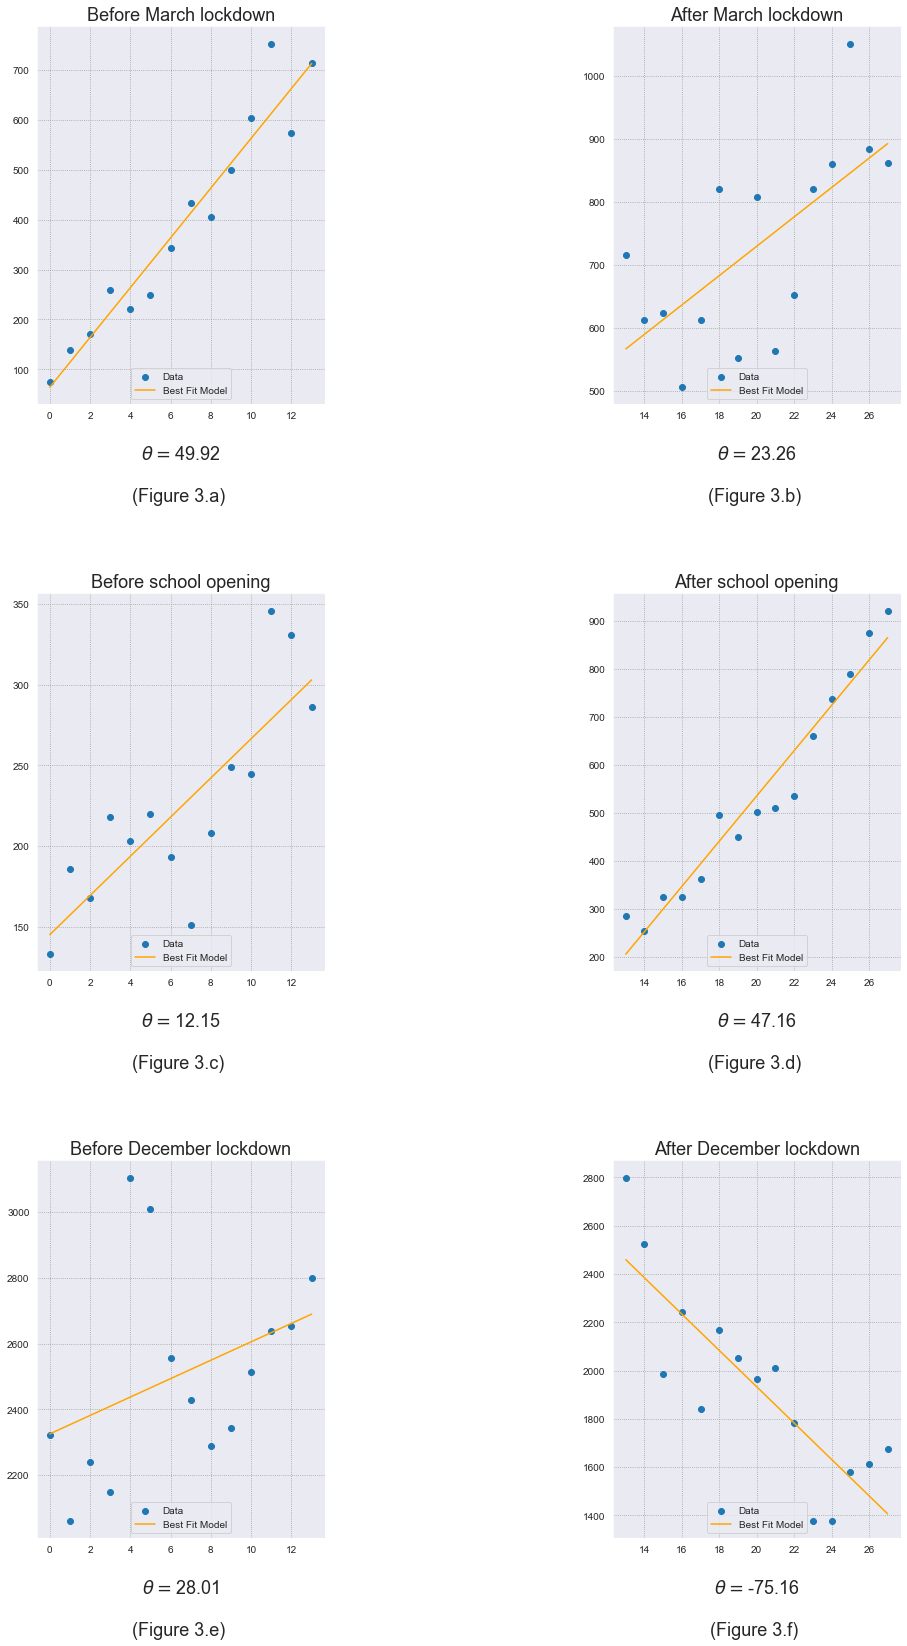

In [29]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

reg_fig_names = (
    ("(Figure 3.a) ", "(Figure 3.b) "),
    ("(Figure 3.c) ", "(Figure 3.d) "),
    ("(Figure 3.e) ", "(Figure 3.f) ")
)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)

# Instantitate our LinearRegression object

lr = LinearRegression()

for i in range(3):
    
    for j in range(2):
        
        # Since the two periods have different number of days we will model accordingly
        
        if regression_data[i][j][0].size == 14:

            lr.fit(regression_data[i][j][0].values.reshape(14,-1), regression_data[i][j][1])
            
        else:
            
            lr.fit(regression_data[i][j][0].values.reshape(15,-1), regression_data[i][j][1])
            
        # Our Theta

        temp_co = lr.coef_
        
        # Our intercept

        temp_inter = lr.intercept_
        
        # We plot the scatterplot for each period of each event

        ax[i][j].scatter(x = regression_data[i][j][0], y = regression_data[i][j][1], label='Data')
        
        # We plot our model
        
        ax[i][j].plot( regression_data[i][j][0], regression_data[i][j][0] * temp_co + temp_inter, color = 'orange', label='Best Fit Model')
        
        # Adding legend
        
        ax[i][j].legend(loc='lower center')
        
        # Adding titles
        
        ax[i][j].set_title(sub_titles[i][j], fontsize = 18)
        
        # Displaying our Theta value
        
        ax[i][j].set_xlabel('\n' + r'${\theta=}$' + str(float(np.round(temp_co,2))) + f'\n\n{reg_fig_names[i][j]}', fontsize = 18)

## Observation:

<ul>

   <li>
       March Lockdown: We notice that the rate before the lockdown was increasing by almost 50 cases per day. However, after the lockdown, we still had an increase in the number of cases but with a much less rate of 23 people per day.
   </li>
   <br>
   <li>
       School Lockdown: We notice that the rate before the schools opening was increasing by almost 12 cases per day. However, after the lockdown, we still had a severe increase in the number of cases with a much higher rate of 47 people per day.
   </li>
   <br>
   <li>
       December Lockdown: This is by far the best results we obtained. We notice that the rate before the lockdown was increasing by almost 28 cases per day. However, after the lockdown, we started observing a decrease in the number of cases with an impressive rate of 75.
   </li>
   <br>
    
</ul>

## Complete Visualization:

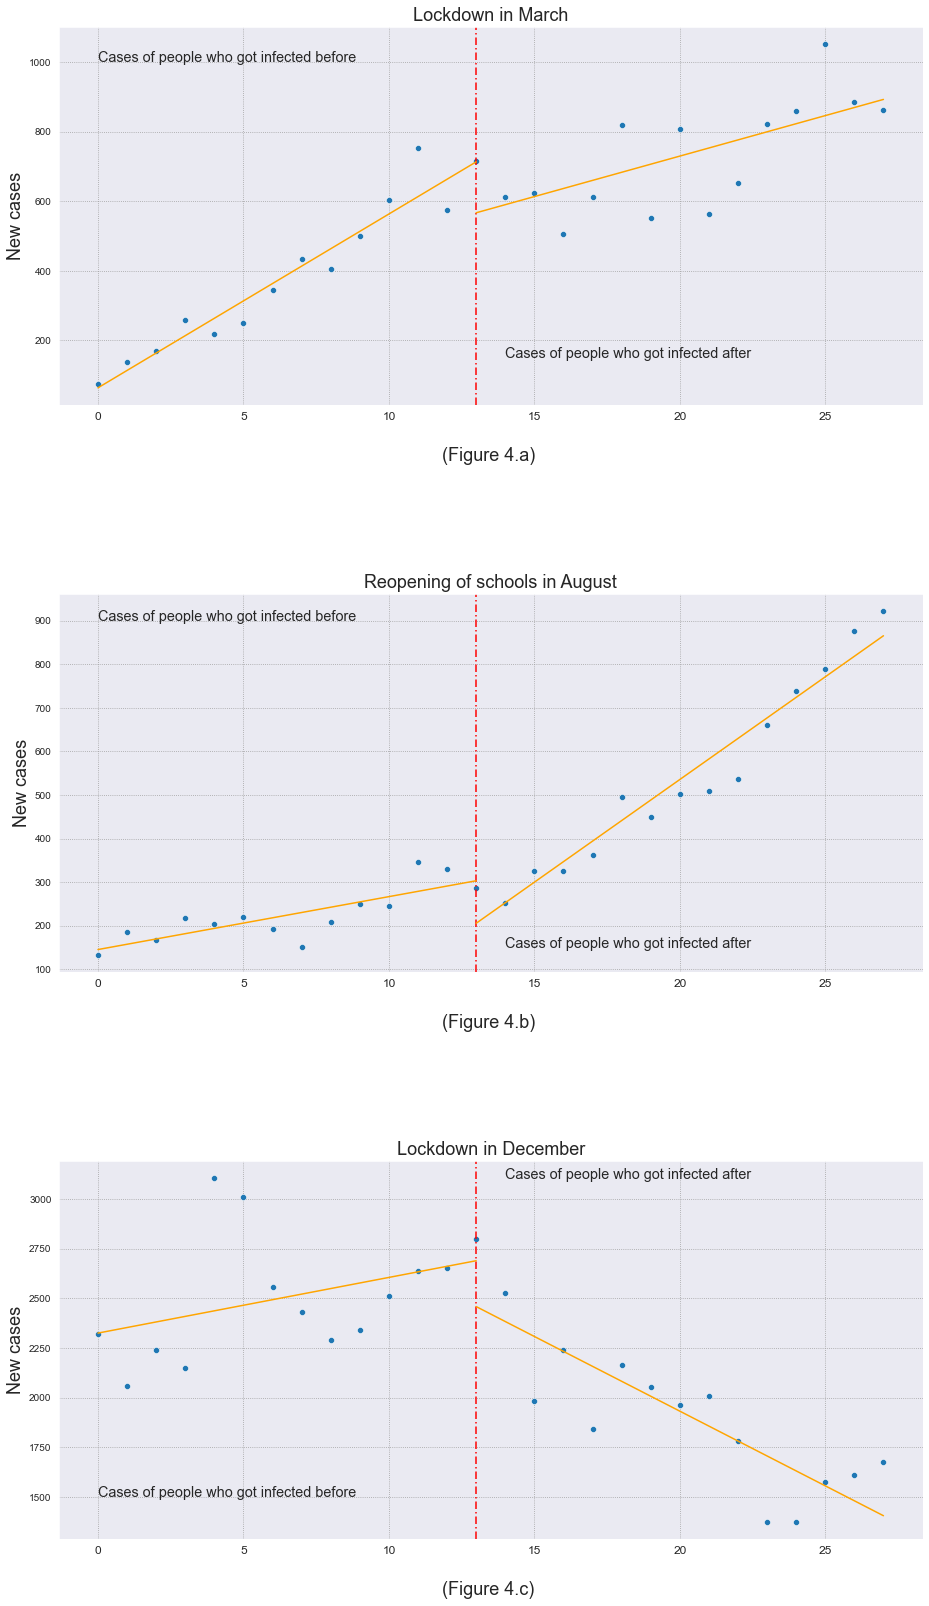

In [210]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)

rdd_nums = ('(Figure 4.a) ','(Figure 4.b) ','(Figure 4.c) ')

for i in range(3):
    
    # We plot the scatter plot for each event

    sns.scatterplot(data = dates_day_dummy[i], x = 'Day', y = 'Nb_New_Cases', ax = ax[i])
    
    # We plot our threshold

    ax[i].axvline(dates_day_dummy[i].iloc[13]['Day'], color = 'red', dashes = (5, 2, 1, 2))
    
    # Assign titles

    ax[i].set_title(title[i], fontsize = 18)
    
    # Assign y lables

    ax[i].set_ylabel('New cases', fontsize = 18)
    
    # Assign x lables

    ax[i].set_xlabel(f'\n{rdd_nums[i]}', fontsize = 18)
    
    # Remove the x ticks since they really aren't relevant now

    ax[i].tick_params(axis='x', labelsize = 'large')
    
    # Text for cases before
    
    ax[i].text(x = dates_day_dummy[i].iloc[0]['Day'], y = text_y_location[i][0], s = texts[i][0], size = 'x-large')
    
    # Text for cases after
    
    ax[i].text(x = dates_day_dummy[i].iloc[14]['Day'], y = text_y_location[i][1], s = texts[i][1], size = 'x-large')
    
    # We fit our model for our x before and y before
    
    lr.fit(regression_data[i][0][0].values.reshape(14,-1), regression_data[i][0][1])
    
    temp_co = lr.coef_

    temp_inter = lr.intercept_
    
    ax[i].plot(regression_data[i][0][0], regression_data[i][0][0] * temp_co + temp_inter, color = 'orange')
    
    # We fit our model for our x after and y after
    
    lr.fit(regression_data[i][1][0].values.reshape(15,-1), regression_data[i][1][1])
    
    temp_co = lr.coef_

    temp_inter = lr.intercept_
    
    ax[i].plot(regression_data[i][1][0], regression_data[i][1][0] * temp_co + temp_inter, color = 'orange')
    

plt.show()

## Statistical Significance:

We only need to observe the validity of our null hypothesis where we assume that the events are not significant.

In [229]:
# We assign a dummy variable for the periods of each event as 0 (pre) and 1 (post)

date1_day_dummy['dummy'] = date1_day_dummy['Day'].apply(lambda x: 0 if x < 14 else 1)

date2_day_dummy['dummy'] = date2_day_dummy['Day'].apply(lambda x: 0 if x < 14 else 1)

date3_day_dummy['dummy'] = date3_day_dummy['Day'].apply(lambda x: 0 if x < 14 else 1)

In [246]:
sm.OLS(date1_day_dummy['Nb_New_Cases'], date1_day_dummy['dummy']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Nb_New_Cases   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.699
Method:                 Least Squares   F-statistic:                              65.92
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                    1.01e-08
Time:                        16:22:28   Log-Likelihood:                         -202.16
No. Observations:                  28   AIC:                                      406.3
Df Residuals:                      27   BIC:                                      407.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dummy        730.5714     89.979      8.119      0.000     545.949     915.194
==============================================================================
Omnibus:                        1.313   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                1.222
Skew:                           0.389   Prob(JB):                        0.543
Kurtosis:                       2.336   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
sm.OLS(date2_day_dummy['Nb_New_Cases'], date2_day_dummy['dummy']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Nb_New_Cases   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              85.99
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                    6.99e-10
Time:                        16:21:04   Log-Likelihood:                         -190.65
No. Observations:                  28   AIC:                                      383.3
Df Residuals:                      27   BIC:                                      384.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dummy        553.2857     59.665      9.273      0.000     430.863     675.708
==============================================================================
Omnibus:                        3.333   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.913
Skew:                          -0.718   Prob(JB):                        0.233
Kurtosis:                       2.343   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
sm.OLS(date3_day_dummy['Nb_New_Cases'], date3_day_dummy['dummy']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Nb_New_Cases   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              14.59
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                    0.000712
Time:                        16:21:05   Log-Likelihood:                         -249.60
No. Observations:                  28   AIC:                                      501.2
Df Residuals:                      27   BIC:                                      502.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dummy       1871.0000    489.847      3.820      0.001     865.916    2876.084
==============================================================================
Omnibus:                       42.815   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.666
Skew:                          -0.006   Prob(JB):                        0.160
Kurtosis:                       1.227   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Verdict:

All events have significant p-values which allows us to reject the null hypothesis for each and every event. This means that the events that took place are statistically significant.

# Conclusion:

It is important to note that there are certainly other factors affecting the cases of Covid-19. However, it is safe to assume that the measures taken by the government of Quebec have proven to have a significant correlation with the number of cases. It is common sense that lockdowns will not prevent the spread of Covid-19 completely but it will slow it down as we observed. It is also reasonable that the number of cases would skyrocket after schools opening since children are the most dangerous carriers because of their interaction with each other in schools which later translates into their households.